In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
df = pd.read_csv("C:\\Users\\amiro\\Desktop\\Internship cognifiz\\Dataset .csv")

In [5]:
print("Dataset loaded successfully!")
df.head()

Dataset loaded successfully!


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229



Percentage Distribution of Price Ranges:
Price range
1    46.529159
2    32.593446
3    14.741912
4     6.135483
Name: proportion, dtype: float64

Most Common Price Range: 1 (46.53%)


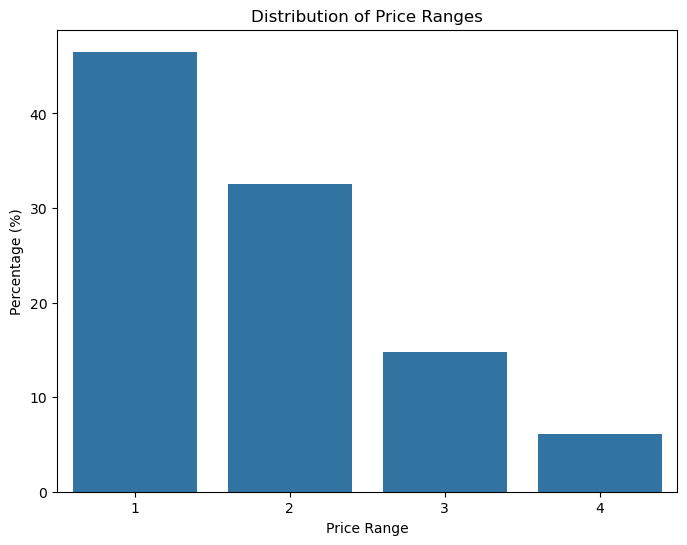

In [7]:
# Step 1: Most Common Price Range
price_range_counts = df['Price range'].value_counts(normalize=True) * 100
print("\nPercentage Distribution of Price Ranges:")
print(price_range_counts)
most_common_price = price_range_counts.idxmax()
print(f"\nMost Common Price Range: {most_common_price} ({price_range_counts[most_common_price]:.2f}%)")

plt.figure(figsize=(8, 6))
sns.barplot(x=price_range_counts.index, y=price_range_counts.values)
plt.title('Distribution of Price Ranges')
plt.xlabel('Price Range')
plt.ylabel('Percentage (%)')
plt.show()


Average Rating by Price Range:
Price range
1    1.999887
2    2.941054
3    3.683381
4    3.817918
Name: Aggregate rating, dtype: float64


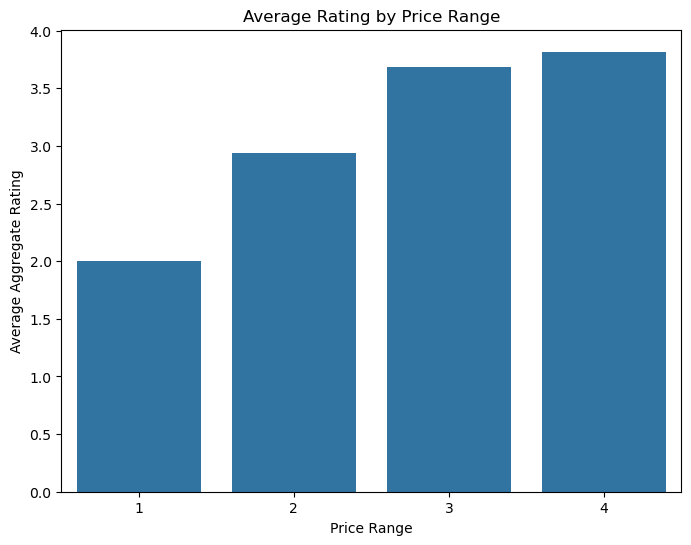

In [9]:
# Step 2: Average Rating by Price Range
avg_rating_by_price = df.groupby('Price range')['Aggregate rating'].mean()
print("\nAverage Rating by Price Range:")
print(avg_rating_by_price)

plt.figure(figsize=(8, 6))
sns.barplot(x=avg_rating_by_price.index, y=avg_rating_by_price.values)
plt.title('Average Rating by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Average Aggregate Rating')
plt.show()


Average Rating by Price Range and Rating Color:
Rating color  Dark Green     Green    Orange       Red  White    Yellow
Price range                                                            
1               4.668750  4.157639  3.040464  2.293548    0.0  3.661842
2               4.627536  4.159385  3.048491  2.300000    0.0  3.671159
3               4.646032  4.169231  3.097764  2.305000    0.0  3.716265
4               4.709459  4.188144  3.162376  2.283333    0.0  3.716000

Color Representing Highest Average Rating by Price Range:
Price Range 1: Dark Green (Average Rating: 4.67)
Price Range 2: Dark Green (Average Rating: 4.63)
Price Range 3: Dark Green (Average Rating: 4.65)
Price Range 4: Dark Green (Average Rating: 4.71)


<Figure size 1000x600 with 0 Axes>

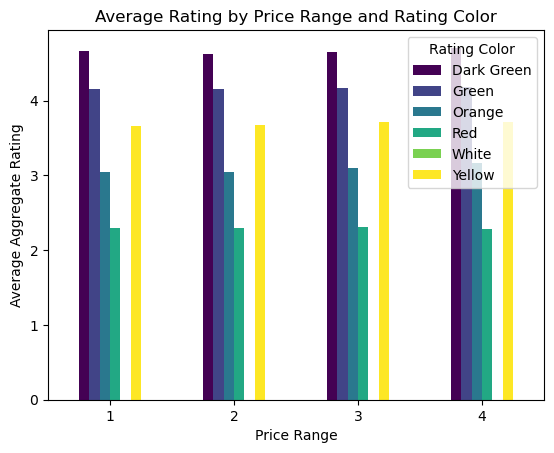

In [11]:
# Step 3: Color for Highest Average Rating by Price Range
color_rating_by_price = df.groupby(['Price range', 'Rating color'])['Aggregate rating'].mean().unstack()
print("\nAverage Rating by Price Range and Rating Color:")
print(color_rating_by_price)

highest_rating_colors = {}
for price in color_rating_by_price.index:
    max_rating = color_rating_by_price.loc[price].max()
    color = color_rating_by_price.loc[price].idxmax()
    highest_rating_colors[price] = (color, max_rating)

print("\nColor Representing Highest Average Rating by Price Range:")
for price, (color, rating) in highest_rating_colors.items():
    print(f"Price Range {price}: {color} (Average Rating: {rating:.2f})")

plt.figure(figsize=(10, 6))
color_rating_by_price.plot(kind='bar', colormap='viridis')
plt.title('Average Rating by Price Range and Rating Color')
plt.xlabel('Price Range')
plt.ylabel('Average Aggregate Rating')
plt.legend(title='Rating Color')
plt.xticks(rotation=0)
plt.show()